<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [4]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Load the dataset


In [5]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




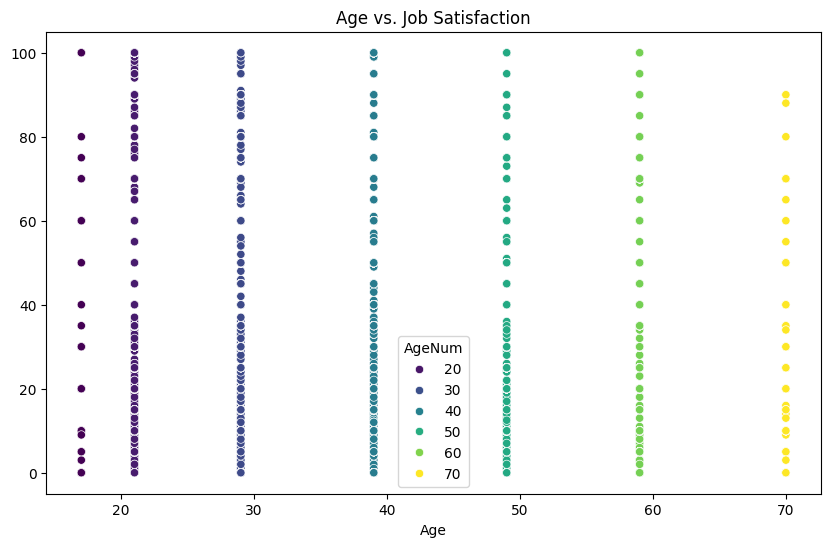

In [6]:
## Write your code here
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 29, '35-44 years old': 39,
    '45-54 years old': 49, '55-64 years old': 59, '65 years or older': 70, 'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Filter out rows with missing values in 'AgeNum' and 'JobSatPoints_6'
df_filtered = df.dropna(subset=['AgeNum', 'JobSatPoints_6'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='AgeNum', y='JobSatPoints_6', hue='AgeNum', palette='viridis')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('') 
plt.title('Age vs. Job Satisfaction')

# Show the plot
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


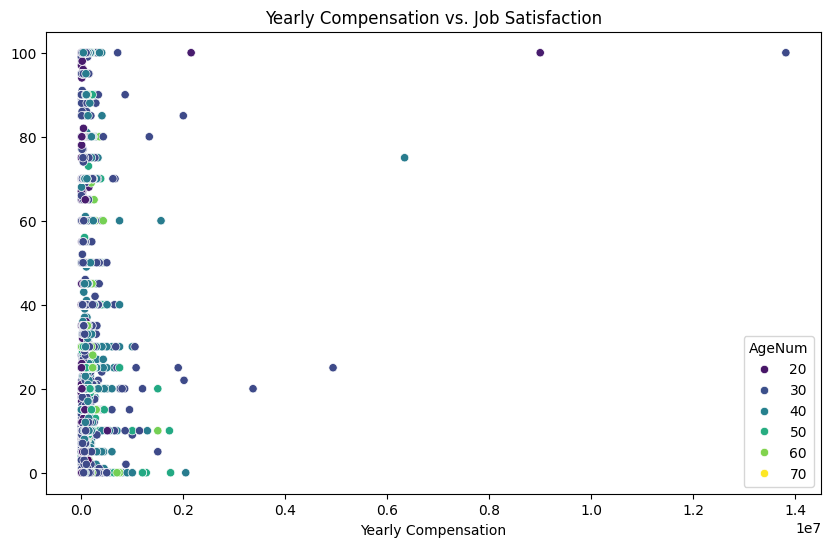

In [7]:
df_filtered = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='ConvertedCompYearly', y='JobSatPoints_6', hue='AgeNum', palette='viridis')

# Set labels and title
plt.xlabel('Yearly Compensation')
plt.ylabel('') 
plt.title('Yearly Compensation vs. Job Satisfaction')

# Show the plot
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


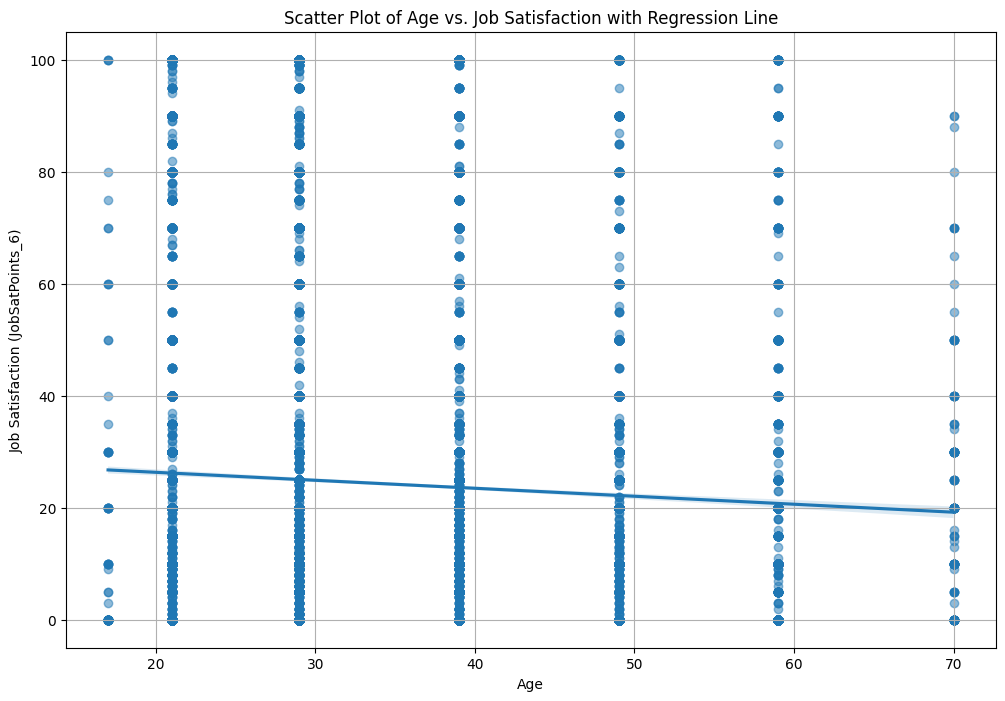

In [8]:
## Write your code here
# Convert the 'Age' column to numeric values for better plotting
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 29, '35-44 years old': 39,
    '45-54 years old': 49, '55-64 years old': 59, '65 years or older': 70, 'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Filter out rows with missing values in 'AgeNum' and 'JobSatPoints_6'
df_filtered = df.dropna(subset=['AgeNum', 'JobSatPoints_6'])

# Create the scatter plot with a regression line
plt.figure(figsize=(12, 8))
sns.regplot(data=df_filtered, x='AgeNum', y='JobSatPoints_6', scatter=True, fit_reg=True, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Age vs. Job Satisfaction with Regression Line')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


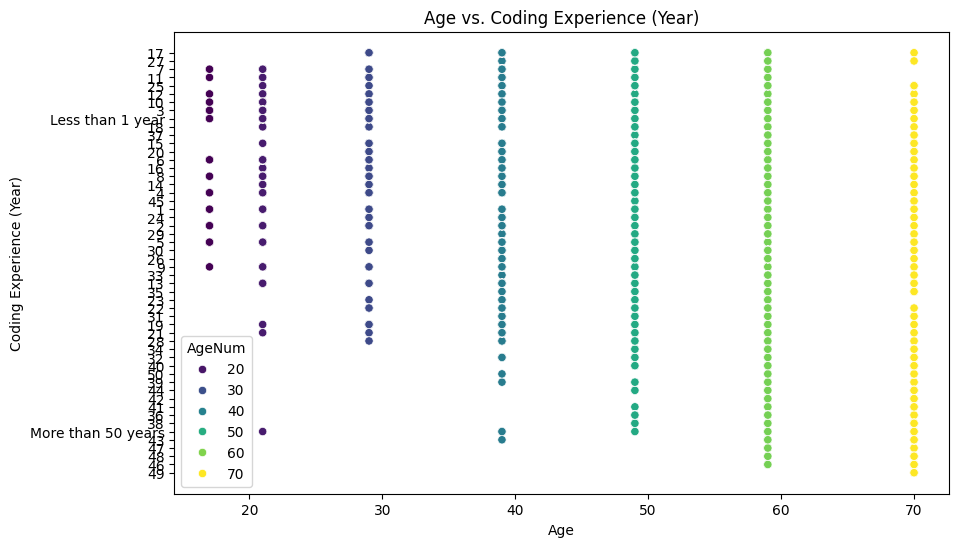

In [9]:
## Write your code here
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 29, '35-44 years old': 39,
    '45-54 years old': 49, '55-64 years old': 59, '65 years or older': 70, 'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

df_filtered = df.dropna(subset=['AgeNum', 'YearsCodePro'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='AgeNum', y='YearsCodePro', hue='AgeNum', palette='viridis')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Coding Experience (Year)') 
plt.title('Age vs. Coding Experience (Year)')

# Show the plot
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


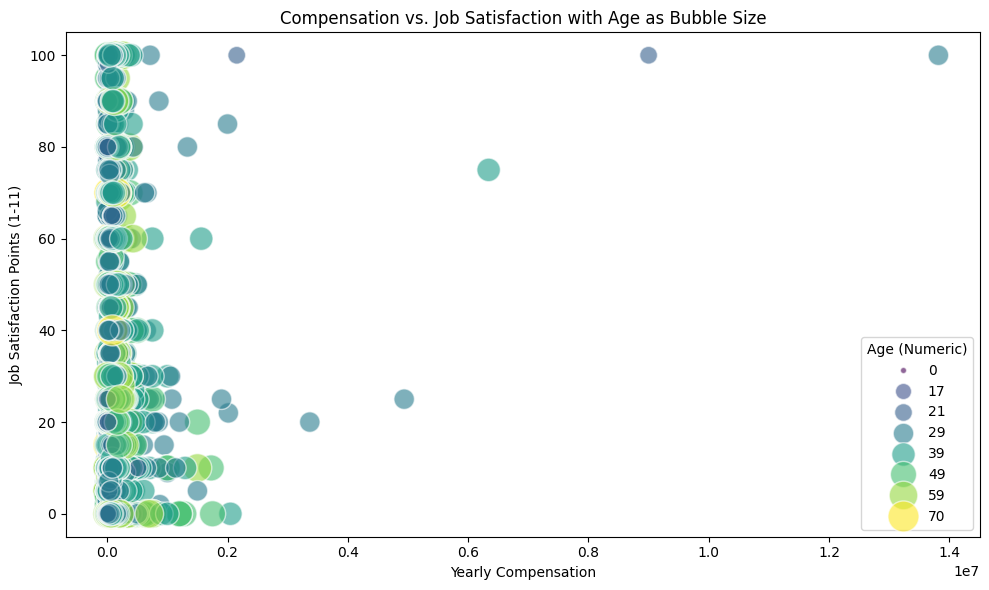

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter to keep necessary columns without missing values
df_filtered = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age'])

# Map age category to positive numeric values for bubble sizes 
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': 0  # You can also remove these rows instead
}
df_filtered = df[(df['ConvertedCompYearly'].notna()) & 
                 (df['JobSatPoints_6'].notna()) & 
                 (df['Age'].notna())].copy()

df_filtered['AgeNum'] = df_filtered['Age'].map(age_mapping)


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_filtered,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    size='AgeNum',
    sizes=(20, 500),      # Minimum and maximum bubble size
    alpha=0.6,
    hue='AgeNum',
    palette='viridis',
    legend='full'
)

plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction Points (1-11)')
plt.title('Compensation vs. Job Satisfaction with Age as Bubble Size')
plt.legend(title='Age (Numeric)')
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


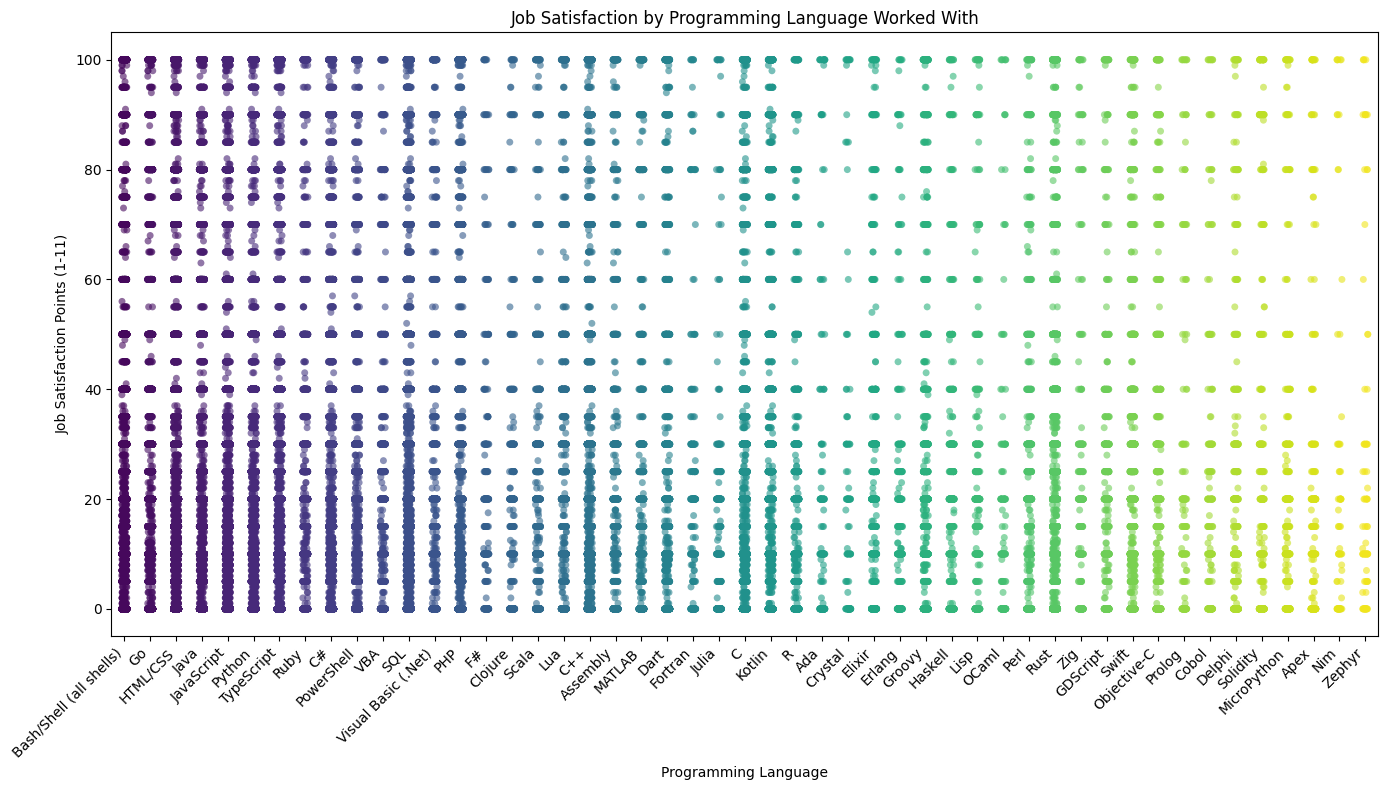

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing satisfaction or language data
df_filtered = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6'])

# Split the languages string by ';' and explode to have one language per row
df_exploded = df_filtered.assign(
    Language=df_filtered['LanguageHaveWorkedWith'].str.split(';')
).explode('Language')

# Strip whitespace if any
df_exploded['Language'] = df_exploded['Language'].str.strip()

plt.figure(figsize=(14, 8))

# Create scatter plot with jitter on categorical axis
sns.stripplot(
    data=df_exploded,
    x='Language',
    y='JobSatPoints_6',
    hue='Language',    # Assign the categorical x variable also to hue
    palette='viridis',
    jitter=True,
    size=5,
    alpha=0.6,
    legend=False       # Hide the redundant legend
)


plt.xticks(rotation=45, ha='right')
plt.xlabel('Programming Language')
plt.ylabel('Job Satisfaction Points (1-11)')
plt.title('Job Satisfaction by Programming Language Worked With')
plt.tight_layout()
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/tmp/ipykernel_1665/3127771598.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


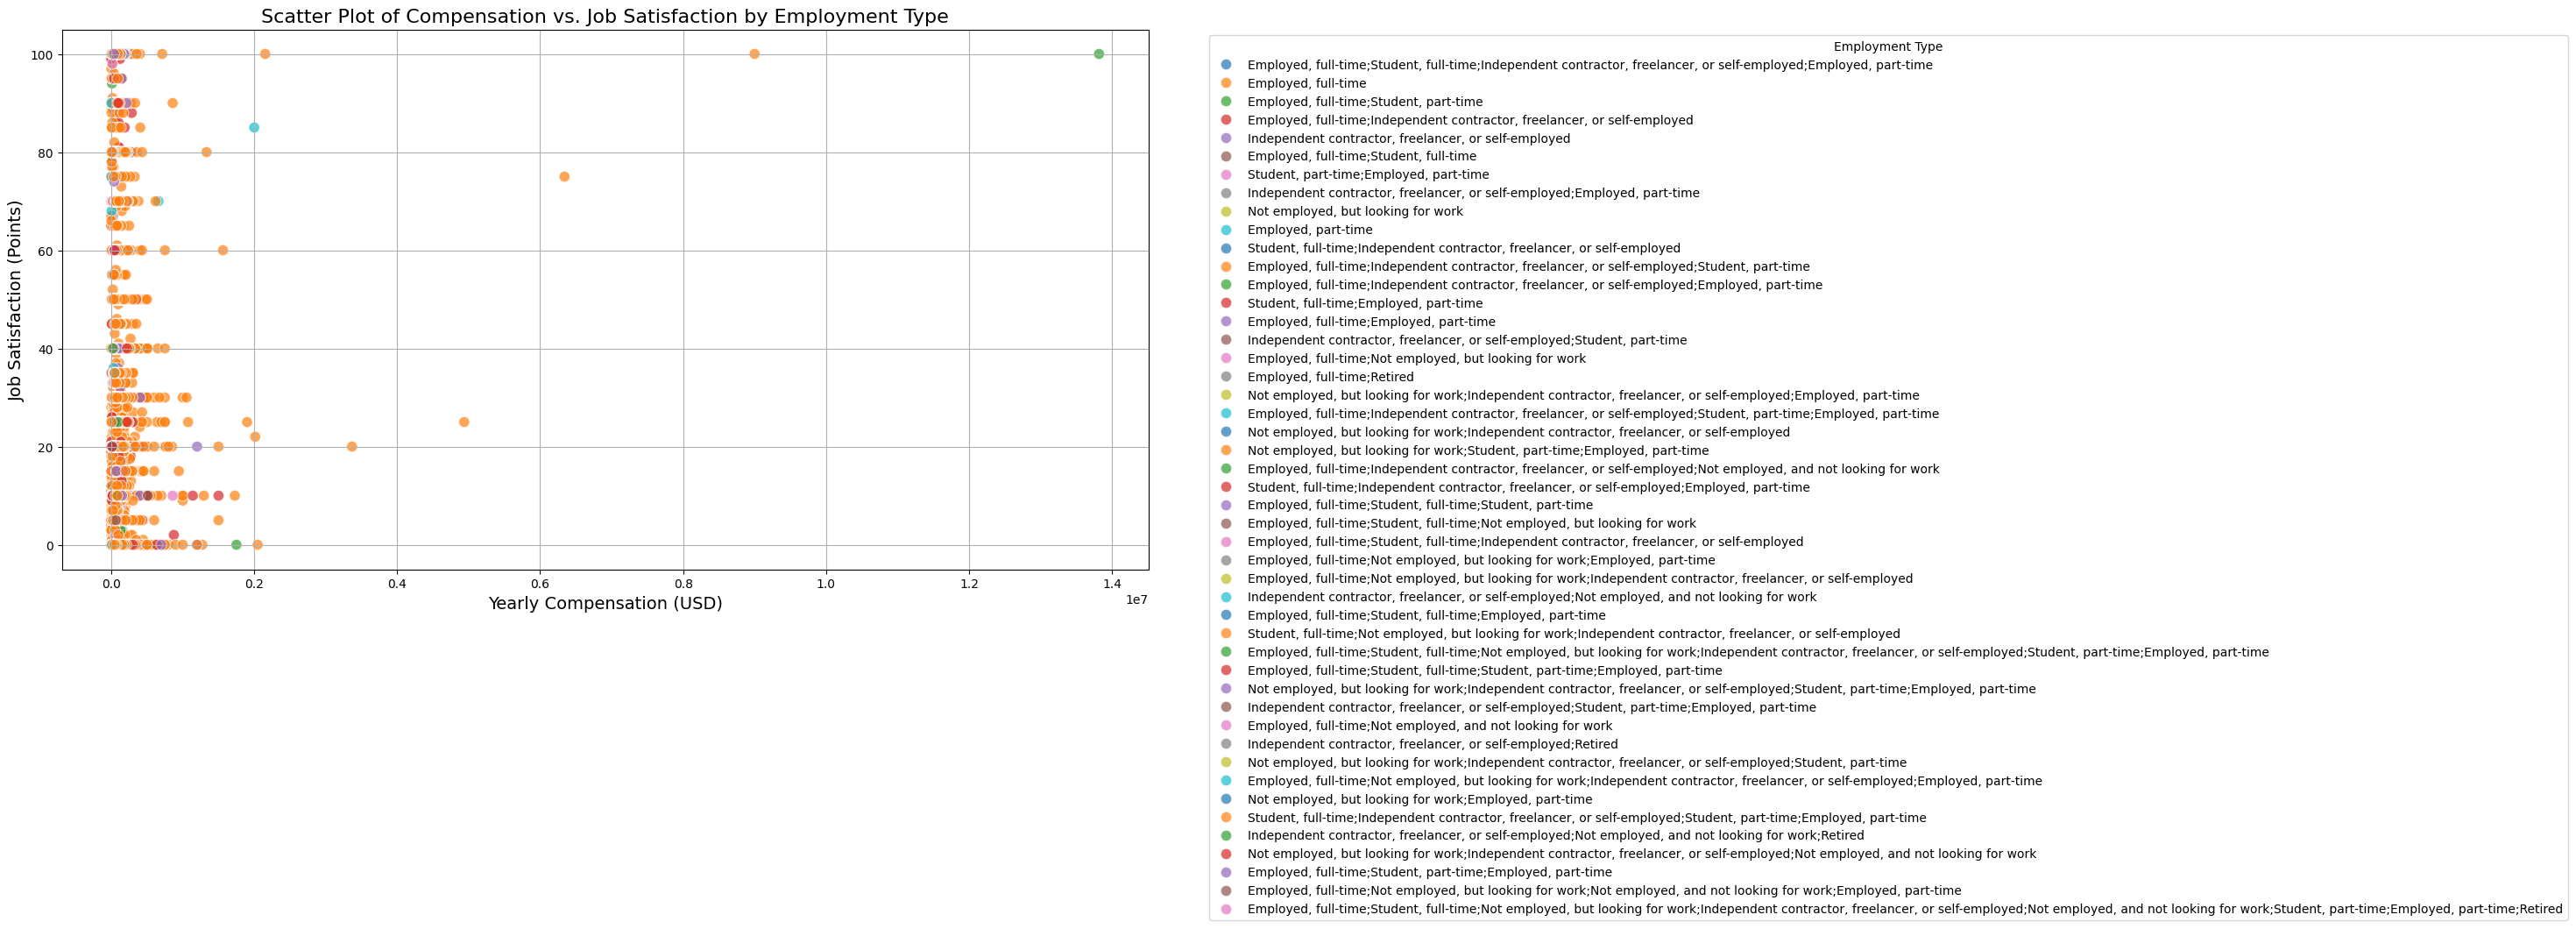

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (if not done yet)
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Filter out rows with missing values in relevant columns
df_filtered = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']).copy()

# Plot settings
plt.figure(figsize=(16, 8))  # Wider figure to fit legend outside

# Create scatter plot: Compensation vs Job Satisfaction, colored by Employment type
sns.scatterplot(
    data=df_filtered,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    hue='Employment',
    palette='tab10',
    alpha=0.7,
    edgecolor='w',  # White edges for clarity
    s=80            # Marker size
)

# Titles and axis labels
plt.title('Scatter Plot of Compensation vs. Job Satisfaction by Employment Type', fontsize=16)
plt.xlabel('Yearly Compensation (USD)', fontsize=14)
plt.ylabel('Job Satisfaction (Points)', fontsize=14)

# Legend outside the plot
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 10})

# Grid for readability
plt.grid(True)

# Adjust layout: leave space on right for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for no missing values in required columns
df_filtered = df.dropna(subset=['YearsCodePro', 'Age', 'Country']).copy()

# Because 'Age' is categorical (age groups), optionally define an ordered category if needed
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', 
    '35-44 years old', '45-54 years old', '55-64 years old', 
    '65 years or older', 'Prefer not to say'
]
df_filtered['Age'] = pd.Categorical(df_filtered['Age'], categories=age_order, ordered=True)

# (Optional) Convert 'YearsCodePro' to numeric if required, coercing errors to NaN
df_filtered['YearsCodePro'] = pd.to_numeric(df_filtered['YearsCodePro'], errors='coerce')
df_filtered = df_filtered.dropna(subset=['YearsCodePro'])

plt.figure(figsize=(16, 8))

# Scatterplot with country as color (hue) and age group as marker style
sns.scatterplot(
    data=df_filtered,
    x='YearsCodePro',     # Work experience (numeric)
    y='Age',              # Age groups (categorical, on y-axis)
    hue='Country',        # Color points by country
    style='Age',          # Different markers by age group for clarity
    palette='tab20',      # Palette with many distinct colors for countries
    alpha=0.7,
    s=80,
    edgecolor='w'
)

plt.figure(figsize=(16, 10))  # taller figure

# your plotting code ...

plt.title('Your Title', fontsize=16)
plt.xlabel('X label', fontsize=14)
plt.ylabel('Y label', fontsize=14)

plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 10})

plt.grid(True)

plt.tight_layout(rect=[0, 0.05, 0.85, 0.95])  # leave margin on sides and vertical padding

plt.show()


/tmp/ipykernel_1665/2830123220.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 10})


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
